# Geoprostorové vizualizace

# Choropleth map

In [1]:
%%time
# import necessary libraries
import pandas as pd
import geopandas as gpd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, PrintfTickFormatter, HoverTool
from bokeh.palettes import Plasma256
import pycountry

# Enable notebook output
output_notebook()

# load data stored in a CSV file
df = pd.read_csv('data/ds_salaries.csv')

# Convert two-letter country codes to three-letter codes
df['employee_residence'] = df['employee_residence'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3)

# Group by 'employee_residence' and calculate the average 'salary_in_usd'
avg_salaries = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the average salaries data with the world shapefile
world = world.merge(avg_salaries, left_on='iso_a3', right_on='employee_residence', how='left')

# Create a GeoJSONDataSource from the merged DataFrame
gsource = GeoJSONDataSource(geojson=world.to_json())

# Create a color mapper
color_mapper = LinearColorMapper(palette=Plasma256, low=avg_salaries['salary_in_usd'].min(), high=avg_salaries['salary_in_usd'].max())

# Create a figure
p = figure(title="Average Salary in USD by Country", width=800, height=400)


# Add the map
p.patches('xs', 'ys', source=gsource, fill_color={'field': 'salary_in_usd', 'transform': color_mapper}, line_color='black', line_width=0.5)

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Country", "@name"), ("Average Salary (USD)", "@salary_in_usd{0,0.00}")]
p.add_tools(hover)

# Add color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, formatter=PrintfTickFormatter(format="%0.0f"))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

Loading BokehJS ...

<timed exec>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


CPU times: user 3.14 s, sys: 630 ms, total: 3.77 s
Wall time: 6.85 s


# Časové vizualizace

# Line chart

In [2]:
%%time
# import necessary libraries
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

# Enable notebook output
output_notebook()

# load data stored in a CSV file
df = pd.read_csv("data/flights.csv")

# Filter the data for May flights
may_flights = df[df['month'] == 'May']

# Create a new plot
p = figure(title="Flights in May", x_axis_label="Year", y_axis_label="Passengers")

# Add a line renderer
p.line(may_flights['year'], may_flights['passengers'], line_width=1)

# Create a hover tool
hover = HoverTool(
    tooltips=[
        ("Year", "@x"),
        ("Passengers", "@y"),
    ]
)

# Add the hover tool to the plot
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 117 ms, sys: 138 ms, total: 255 ms
Wall time: 997 ms


# Stacked area chart

In [3]:
%%time
# import necessary libraries
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.palettes import Spectral3

# Enable notebook output
output_notebook()

# Data
x = list(range(1, 6))
y = {'A': [1, 4, 6, 8, 9], 'B': [2, 2, 7, 10, 12], 'C': [2, 8, 5, 10, 6]}

# Convert data to ColumnDataSource
data = {'x': x}
data.update(y)
source = ColumnDataSource(data)

# Create a new plot
p = figure(x_range=(1, 5))

# Add stacked area chart
p.varea_stack(stackers=['A', 'B', 'C'], x='x', color=Spectral3, source=source)

# Create dummy glyphs for legend
glyph_A = p.varea(x=[0], y1=[0], y2=[0], color=Spectral3[0])
glyph_B = p.varea(x=[0], y1=[0], y2=[0], color=Spectral3[1])
glyph_C = p.varea(x=[0], y1=[0], y2=[0], color=Spectral3[2])

# Create legend
legend = Legend(items=[
    LegendItem(label='A', renderers=[glyph_A]),
    LegendItem(label='B', renderers=[glyph_B]),
    LegendItem(label='C', renderers=[glyph_C])
])

# Add legend to plot
p.add_layout(legend)

# Set x-axis label, y-axis label, and title
p.xaxis.axis_label = 'X-axis'
p.yaxis.axis_label = 'Y-axis'
p.title.text = 'Stacked Area Chart'

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 214 ms, sys: 7.3 ms, total: 221 ms
Wall time: 294 ms


# Relační vizualizace

# Scatter plot matrix

In [4]:
%%time
# import necessary libraries
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
import pandas as pd

# load data stored in a CSV file
df = pd.read_csv("data/penguins.csv")

# Enable notebook output
output_notebook()

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Define color palette for species
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
df['color'] = df['species'].map(species_palette)

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(df)

# Create scatter plots and histograms
plots = []
for i, col1 in enumerate(numeric_columns):
    row_plots = []
    for j, col2 in enumerate(numeric_columns):
        if i == j:
            hist, edges = np.histogram(df[col1].dropna(), bins=20)  # Drop NaN values
            p = figure(title=f"{col1} Histogram", background_fill_color="#fafafa", width=300, height=200)
            p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
            p.xaxis.axis_label = col1
            p.yaxis.axis_label = 'Frequency'
        else:
            p = figure(title=f"{col1} vs {col2}", background_fill_color="#fafafa",  width=300, height=200)
            p.circle(x=col2, y=col1, color='color', legend_field='species', source=source)
            p.xaxis.axis_label = col2
            p.yaxis.axis_label = col1

            # Add hover tool
            hover = HoverTool(tooltips=[(col2, f"@{col2}"), (col1, f"@{col1}"), ("species", "@species")])
            p.add_tools(hover)
        row_plots.append(p)
    plots.append(row_plots)

# Arrange plots into a grid
grid = gridplot(plots)

# Show the plot
show(grid)

Loading BokehJS ...

CPU times: user 1.55 s, sys: 33.1 ms, total: 1.59 s
Wall time: 2.04 s


# Tree map

In [5]:
%%time
# import necessary libraries
import pandas as pd
from squarify import normalize_sizes, squarify
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# load data stored in a CSV file
data = pd.read_csv("data/SampleSuperstore.csv")

data = data[["City", "Region", "Sales"]]

regions = ("West", "Central", "South", "East")

sales_by_city = data.groupby(["Region", "City"]).sum("Sales")
sales_by_city = sales_by_city.sort_values(by="Sales").reset_index()

sales_by_region = sales_by_city.groupby("Region").sum("Sales").sort_values(by="Sales")

def treemap(df, col, x, y, dx, dy, *, N=100):
    sub_df = df.nlargest(N, col)
    normed = normalize_sizes(sub_df[col], dx, dy)
    blocks = squarify(normed, x, y, dx, dy)
    blocks_df = pd.DataFrame.from_dict(blocks).set_index(sub_df.index)
    return sub_df.join(blocks_df, how='left').reset_index()

x, y, w, h = 0, 0, 1200, 800

blocks_by_region = treemap(sales_by_region, "Sales", x, y, w, h)

dfs = []
for index, (Region, Sales, x, y, dx, dy) in blocks_by_region.iterrows():
    df = sales_by_city[sales_by_city.Region==Region]
    dfs.append(treemap(df, "Sales", x, y, dx, dy, N=10))
blocks = pd.concat(dfs)

p = figure(width=w, height=h, tooltips="@City", toolbar_location=None,
           x_axis_location=None, y_axis_location=None)
p.x_range.range_padding = p.y_range.range_padding = 0
p.grid.grid_line_color = None

p.block('x', 'y', 'dx', 'dy', source=blocks, line_width=1, line_color="white",
        fill_alpha=0.8, fill_color=factor_cmap("Region", "MediumContrast4", regions))

p.text('x', 'y', x_offset=2, text="Region", source=blocks_by_region,
       text_font_size="18pt", text_color="white")

blocks["ytop"] = blocks.y + blocks.dy
p.text('x', 'ytop', x_offset=2, y_offset=2, text="City", source=blocks,
       text_font_size="6pt", text_baseline="top",
       text_color=factor_cmap("Region", ("black", "white", "black", "white"), regions))

show(p)

Loading BokehJS ...

CPU times: user 461 ms, sys: 24.7 ms, total: 486 ms
Wall time: 666 ms


# Vizualizace rozdělení

# Population pyramid

In [6]:
%%time
# import necessary libraries
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# data
testdata = pd.DataFrame({'age': [20, 20, 21, 21, 22, 22, 23, 23],
                'gender': ["male", "female", "male", "female", "male", "female", "male", "female"],
                'count': [10, 12, 13, 10, 16, 14, 17, 16]})

# Make female counts negative
testdata.loc[testdata['gender'] == 'female', 'count'] *= -1

# Separate male and female data
male = testdata[testdata['gender'] == 'male']
female = testdata[testdata['gender'] == 'female']

# Create a new figure
p = figure(y_range=(15, 25))

# Add horizontal bar glyphs (hbar) to the figure
p.hbar(y=male['age'], right=male['count'], height=0.8, color="blue", legend_label="Male")
p.hbar(y=female['age'], right=female['count'], height=0.8, color="orange", legend_label="Female")

# Add hover tool
hover = HoverTool(tooltips=[("Age", "@y"), ("Count", "@right")])
p.add_tools(hover)

# Set x-axis labels
p.xaxis.ticker = [-20, -10, 0, 10, 20]
p.xaxis.major_label_overrides = {-20: '20', -10: '10', 0: '0', 10: '10', 20: '20'}

# Show the figure
show(p)

Loading BokehJS ...

CPU times: user 341 ms, sys: 14.2 ms, total: 355 ms
Wall time: 430 ms


# Histogram

In [1]:
%%time
# import necessary libraries
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import pandas as pd

# Enable notebook output
output_notebook()

# load data stored in a CSV file
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')


# Create a histogram of ages
p = figure(title="Histogram of Ages", x_axis_label="Age", y_axis_label="Frequency")

# Create the histogram
hist, edges = np.histogram(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
r = p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="skyblue")

# Create a hover tool
hover = HoverTool(tooltips=[
    ("Age", "@left - @right"),
    ("Frequency", "@top"),
], renderers=[r])

# Add the hover tool to the plot
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 2.39 s, sys: 295 ms, total: 2.68 s
Wall time: 4.62 s


# Box plot

In [8]:
%%time
# import necessary libraries
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Whisker
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11
import pandas as pd

# Enable notebook output
output_notebook()

# load data stored in a CSV file
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')

# Group data by Medical Condition
grouped = df.groupby('Medical Condition')['Days in Hospital']

# Calculate quantiles
qs = grouped.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ['Medical Condition', 'q1', 'q2', 'q3']
df_new = pd.merge(df, qs, on='Medical Condition', how='left')

# Calculate IQR outlier bounds
iqr = df_new['q3'] - df_new['q1']

mad = (df_new['Days in Hospital'] - df_new['Days in Hospital'].mean()).abs().mean()

df_new['upper'] = df_new['q3'] + 1 * mad
df_new['lower'] = df_new['q1'] - 1 * mad

source = ColumnDataSource(df_new)

# Create a figure
p = figure(x_range=df_new['Medical Condition'].unique(), tools="", toolbar_location=None,
           y_range=(0, 35),
           title="Days in Hospital by Medical Condition",
           background_fill_color="#eaefef", y_axis_label="Days in Hospital",
           width=800, height=400)

# Whisker for outlier range
whisker = Whisker(base="Medical Condition", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 15
p.add_layout(whisker)

# Quantile boxes
cmap = factor_cmap("Medical Condition", Spectral11, df_new['Medical Condition'].unique())
p.vbar("Medical Condition", 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
p.vbar("Medical Condition", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# Outliers
outliers = df[~df_new['Days in Hospital'].between(df_new['lower'], df_new['upper'])]
p.scatter("Medical Condition", "Days in Hospital", source=outliers, size=6, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size = "14px"
p.axis.axis_label_text_font_size = "12px"

show(p)

Loading BokehJS ...

CPU times: user 735 ms, sys: 43.2 ms, total: 778 ms
Wall time: 952 ms


# Kategorické vizualizace

# Bar chart

In [5]:
%%time
# import necessary libraries
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# load data stored in a CSV file
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')

# Count the occurrences of each blood type
blood_type_counts = df['Blood Type'].value_counts()

# Convert the counts to a DataFrame
data = pd.DataFrame({'blood_type': blood_type_counts.index, 'count': blood_type_counts.values})

# Create a ColumnDataSource
source = ColumnDataSource(data)

# Create a figure
p = figure(x_range=data['blood_type'], title='Number of Each Blood Type',
           toolbar_location=None, tools="")

# Create a bar plot
p.vbar(x='blood_type', top='count', width=0.9, source=source, color="skyblue")

# Customize the plot

p.y_range.start = 0
p.xaxis.axis_label = 'Blood Type'
p.yaxis.axis_label = 'Count'
# Show the plot
show(p)


Loading BokehJS ...

CPU times: user 243 ms, sys: 145 ms, total: 388 ms
Wall time: 527 ms


# Stacked bar chart

In [2]:
%%time
# import necessary libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# create DataFrame
students = pd.DataFrame({"Boys": [67, 78],
                        "Girls": [72, 80], },
                        index=["First Year", "Second Year"])

# Convert DataFrame to ColumnDataSource
source = ColumnDataSource(students)

# Create a list of categories (years)
years = source.data['index'].tolist()

# Create a figure object
p = figure(x_range=years, title="Intermediate Students Pass %")

# Create a stacked bar chart
p.vbar_stack(['Boys', 'Girls'], x='index', width=0.9, source=source,
             color=Category10[3][:2], legend_label=["Boys", "Girls"])

# Create a hover tool
hover = HoverTool()
hover.tooltips=[
    ('Boys', '@Boys'),
    ('Girls', '@Girls'),]

# Add the hover tool to the plot
p.add_tools(hover)

# Add Title and Labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Percentage Ranges"

# Move the legend to the top left corner
p.legend.location = "top_left"

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 147 ms, sys: 10.2 ms, total: 157 ms
Wall time: 329 ms


# Grouped bar chart

In [3]:
%%time
# import necessary libraries
from bokeh.io import show, output_notebook
from bokeh.models import FactorRange, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10
import pandas as pd

# Enable notebook output
output_notebook()

# load data stored in a CSV file
data = pd.read_csv('data/penguins.csv')

# Calculate the mean flipper length for each species and sex
mean_data = data.groupby(['species', 'sex'])['flipper_length_mm'].mean().reset_index()

# Create a new column that combines species and sex
mean_data['species_sex'] = list(zip(mean_data.species, mean_data.sex))

# Create a figure
p = figure(x_range=FactorRange(*mean_data['species_sex']), title="Mean Flipper Length for 3 Penguin Species by Sex")

# Create a grouped bar chart with different colors for each sex
p.vbar(x='species_sex', top='flipper_length_mm', width=0.9, source=mean_data, 
       fill_color=factor_cmap('sex', palette=Category10[10], factors=mean_data.sex.unique()))

# Create a hover tool
hover = HoverTool()
hover.tooltips=[
    ('Species, Sex', '@species_sex'),
    ('Mean Flipper Length', '@flipper_length_mm'),
]

# Add the hover tool to the plot
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 113 ms, sys: 9.22 ms, total: 122 ms
Wall time: 276 ms


# Hierarchické vizualizace

# Gantt chart

In [12]:
%%time
# import necessary libraries
import pandas as pd
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Define data
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])

df['Start'] = pd.to_datetime(df['Start'])
df['Finish'] = pd.to_datetime(df['Finish'])

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create figure
p = figure(y_range=df['Task'].tolist(), x_axis_type='datetime', title="Gantt Chart")

# Add hbar for each task
p.hbar(y='Task', left='Start', right='Finish', height=0.7, source=source)

# Create a hover tool
hover = HoverTool()
hover.tooltips=[
    ('Task', '@Task'),
    ('Start', '@Start{%F}'),
    ('Finish', '@Finish{%F}')]

hover.formatters={'@Start': 'datetime', '@Finish': 'datetime'}  # specify how to format Start and Finish

# Add the hover tool to the plot
p.add_tools(hover)

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 303 ms, sys: 10.9 ms, total: 314 ms
Wall time: 351 ms


# Arc diagram

In [13]:
%%time
# import necessary libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Define data
data = {
    'start_angle': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'end_angle': [0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
    'color': ['blue', 'green', 'red', 'orange', 'yellow', 'purple']
}

# Create a ColumnDataSource
source = ColumnDataSource(data)

# Create figure
p = figure(width=400, height=400, title="Arc Diagram")

# Add arcs
p.arc(x=0, y=0, radius=0.1, start_angle='start_angle', end_angle='end_angle', color='color', alpha=0.6, source=source)

# Show the plot
show(p)

Loading BokehJS ...

CPU times: user 281 ms, sys: 10.1 ms, total: 291 ms
Wall time: 439 ms


# Heat map

In [2]:
%%time
# import necessary libraries
import pandas as pd
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter, HoverTool
from bokeh.plotting import figure, show
from bokeh.transform import transform
from bokeh.palettes import Viridis256
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Load penguins.csv
df = pd.read_csv("data/penguins.csv")

# Remove NaN values
df = df.dropna()

# Extract numeric columns for heatmap
numeric_data = df.select_dtypes(include=['float64'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr().round(2)

# Convert correlation matrix to a DataFrame with multi-index which Bokeh uses as a source
df = pd.DataFrame(corr_matrix.stack(), columns=['value']).reset_index()
df.columns = ['x', 'y', 'value']

# Create Bokeh figure
colors = list(reversed(Viridis256))
mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())
source = ColumnDataSource(df)

p = figure(title="Correlation Heatmap of Penguin Dataset", x_range=list(corr_matrix.columns), y_range=list(corr_matrix.columns[::-1]),
           x_axis_location="above", width=500, height=500,
           tools="hover,save,pan,box_zoom,reset,wheel_zoom", toolbar_location='below')

# Add rectangles for each correlation value
p.rect(x="x", y="y", width=1, height=1, source=source,
       line_color=None, fill_color=transform('value', mapper))

# Create hover tooltip with rounded values
hover = HoverTool(tooltips=[
    ('Correlation', '@value'),])  # Use '@value' to access the value from the ColumnDataSource
p.add_tools(hover)

# Add text annotations for correlation values
text_props = {"source": source, "text_align": "center", "text_baseline": "middle"}
p.text(x="x", y="y", text="value", text_color="white", **text_props)

# Create a color bar 
color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="7px",
                     label_standoff=6, border_line_color=None, location=(0, 0),
                     major_tick_line_color=None)

p.add_layout(color_bar, 'right')

# Show plot
show(p)


Loading BokehJS ...

CPU times: user 257 ms, sys: 189 ms, total: 446 ms
Wall time: 1.52 s


# Chord diagram

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
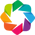

CPU times: user 4.55 s, sys: 763 ms, total: 5.32 s
Wall time: 8.53 s


In [15]:
%%time
# import necessary libraries
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Diagram to be plotted with 'bokeh'
hv.extension('bokeh')
# How large should be the diagram
hv.output(size=300)

# Data set
nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
links = pd.DataFrame(data['links'])

# Chord diagram
chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

# Not needed in a jupyter notebook
# It shows the diagram when run in another IDE or from a python script:
from bokeh.plotting import show
show(hv.render(chord))

# Bubble chart

In [16]:
%%time
# import necessary libraries
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Data
browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}

# Create a bubble chart
p = figure(title = "Browser market share", x_range=browser_market_share['browsers'], height=350)

p.circle(x='browsers', y='market_share', size='market_share', source=browser_market_share, 
         color=factor_cmap('browsers', palette=Spectral6, factors=browser_market_share['browsers']), 
         fill_alpha=0.9, legend_field="browsers")

# Adding hover tool
hover = HoverTool(tooltips=[("Browser","@browsers"),("Market Share","@market_share")])
p.add_tools(hover)

# Adding title and labels
p.xaxis.axis_label = 'Browser'
p.yaxis.axis_label = 'Market Share'

show(p)

Loading BokehJS ...

CPU times: user 388 ms, sys: 12 ms, total: 400 ms
Wall time: 547 ms
